In [739]:
#this is a script for compiling data that has been fully parallelized on the cluster. 

import pandas as pd
import matplotlib.pyplot as plt
import string
import fnmatch
import os
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
import statistics
import paramiko
from paramiko import SSHClient
from scp import SCPClient

#rerun california randomizations



In [764]:

#user defined variables
JobIDint = 2079236
Clade = "birds"
extra_naming_info = ""
ecoregion = False
ecoregion_code = "7"
username = 'mchari'
min_size = 0
max_size = 335
interval = 5



In [765]:
#Local variables: figure out how to automate the jobIDint feature. 
#need to redefine the local
if(ecoregion):
    save_directory = os.getcwd() + '/'+ Clade + '/' +  'ecoregion_data' + '/' + ecoregion_code + '/'
else:
    save_directory = os.getcwd() + '/'+ Clade + '/'
os.makedirs(save_directory, exist_ok=True)
JOBID = str(JobIDint)
tree_sizes_1 = list(range(min_size,max_size,interval))
tree_sizes_2 = []
tree_sizes = tree_sizes_1 + tree_sizes_2
print(tree_sizes)
#tree_sizes = [10,25,50,75,100,350,500,700,900,1000,2000,3000,4000,5000,6000,7000,8000,9000,10000] # define the tree sizes that we have data for (aka: parameter combinations)
metric = 'mpd'
num_files = 1 #predetermine the number of files/runs. This is equivalent to the array_ID from the r script. 
transfer = True;

[0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100, 105, 110, 115, 120, 125, 130, 135, 140, 145, 150, 155, 160, 165, 170, 175, 180, 185, 190, 195, 200, 205, 210, 215, 220, 225, 230, 235, 240, 245, 250, 255, 260, 265, 270, 275, 280, 285, 290, 295, 300, 305, 310, 315, 320, 325, 330]


In [766]:
#establish connection with remote server and transfer files from filenam
#DO NOT RUN THIS UNLESS THE FILES HAVE NOT BEEN TRANSFERRED

if(transfer):
    if(ecoregion):
        hoffman2_path_output = '/u/home/m/' + username + '/bird/Parallel_Hoffman_full/' + Clade + '/ecoregion_data/'+ ecoregion_code +'/' + JOBID + '_output_files'
    else:
        hoffman2_path_output = '/u/home/m/' + username + '/bird/Parallel_Hoffman_full/' + Clade + '/'+ JOBID + '_output_files'
    print(hoffman2_path_output)
    ssh_ob = SSHClient()
    ssh_ob.load_system_host_keys()
    ssh_ob.connect('hoffman2.idre.ucla.edu', username = 'mchari', password= 'Xf4p4D24')
    scp = SCPClient(ssh_ob.get_transport())
    scp.get(hoffman2_path_output, recursive = True)
    print("transfer is done")
    transfer = False;
else:
    print("transfer already complete")
    
#set up local direrctory and establish folder as target

/u/home/m/mchari/bird/Parallel_Hoffman_full/birds/2079236_output_files
transfer is done


In [767]:
cwd = os.getcwd()
target_directory = os.getcwd() + "/" + JOBID +"_output_files/"

In [493]:
#for some reason, only went until 430 

In [728]:
print(target_directory)

/Users/mayachari/Desktop/bird/Parallel_Hoffman_full/2740888_output_files/


In [744]:
# Create dictionary class

class my_dictionary(dict):
 
  # __init__ function
  def __init__(self):
    self = dict()
 
  # Function to add key:value
  def add(self, key, value):
    self[key] = value


In [745]:

#right now the mean part of this function is redundant but I'm keeping it in just in case. 
#avg_mpd_rand = []

#choice of 2 statistics: mpd, mntd
def div_stats(tree_sizes, JobIDint, target_directory, target_statistic):
    dict_mpd = my_dictionary() #initialize new dictionary 
    
    #i don't know why i did it this way. can't remember. 
    if target_statistic == "mpd":
        target_val = 'mpd'
    elif target_statistic == "mntd":
        target_val = 'mntd'
    elif target_statistic == "pd":
        target_val = 'pd'
    else:
        print("error") #add an error
    for i in tree_sizes:
        size = str(i) #gets the i'th data. 
        count = 0
        mpd_sum = 0
        array_temp = []
        name = target_statistic + str(i)
        for file in os.listdir(target_directory): #search every file in the target directory. 
            if file.startswith(size + "_"):
                direct = target_directory + file #go to the directory
                temp_df = pd.read_csv(direct) #read in the csv. 
                temp_df.index =['pd', 'mpd', "mntd"]
                stat_temp = temp_df.loc[target_val]
                #mpd_sum = mpd_sum + temp_df.iloc[0][target_val]
                #count  = count + 1
                array_temp.extend(stat_temp)
        #average_mpd_rnd.append(mpd_sum/count)
        dict_mpd.add(name, array_temp)
    
    return dict_mpd
    
        #average_mpd_rnd.append(mpd.rand)




In [746]:
def remove_empty_values(dictionary):
    # Filter out key-value pairs where the values are not empty
    updated_dict = {key: value for key, value in dictionary.items() if value}

    return updated_dict

In [747]:
def extract_numbers(keys):
    numbers = [int(key[3:]) for key in keys]
    return numbers



In [768]:
#make dictionaries out of available data. 

new_mpd_smallvals = div_stats(tree_sizes, JobIDint, target_directory, 'mpd')
new_mntd_smallvals = div_stats(tree_sizes, JobIDint, target_directory, 'mntd')
new_pd_smallvals = div_stats(tree_sizes, JobIDint, target_directory, 'pd')


In [769]:
new_mpd = remove_empty_values(new_mpd_smallvals)
new_mntd = remove_empty_values(new_mntd_smallvals)
new_pd = remove_empty_values(new_pd_smallvals)
tree_sizes = extract_numbers(new_mpd)



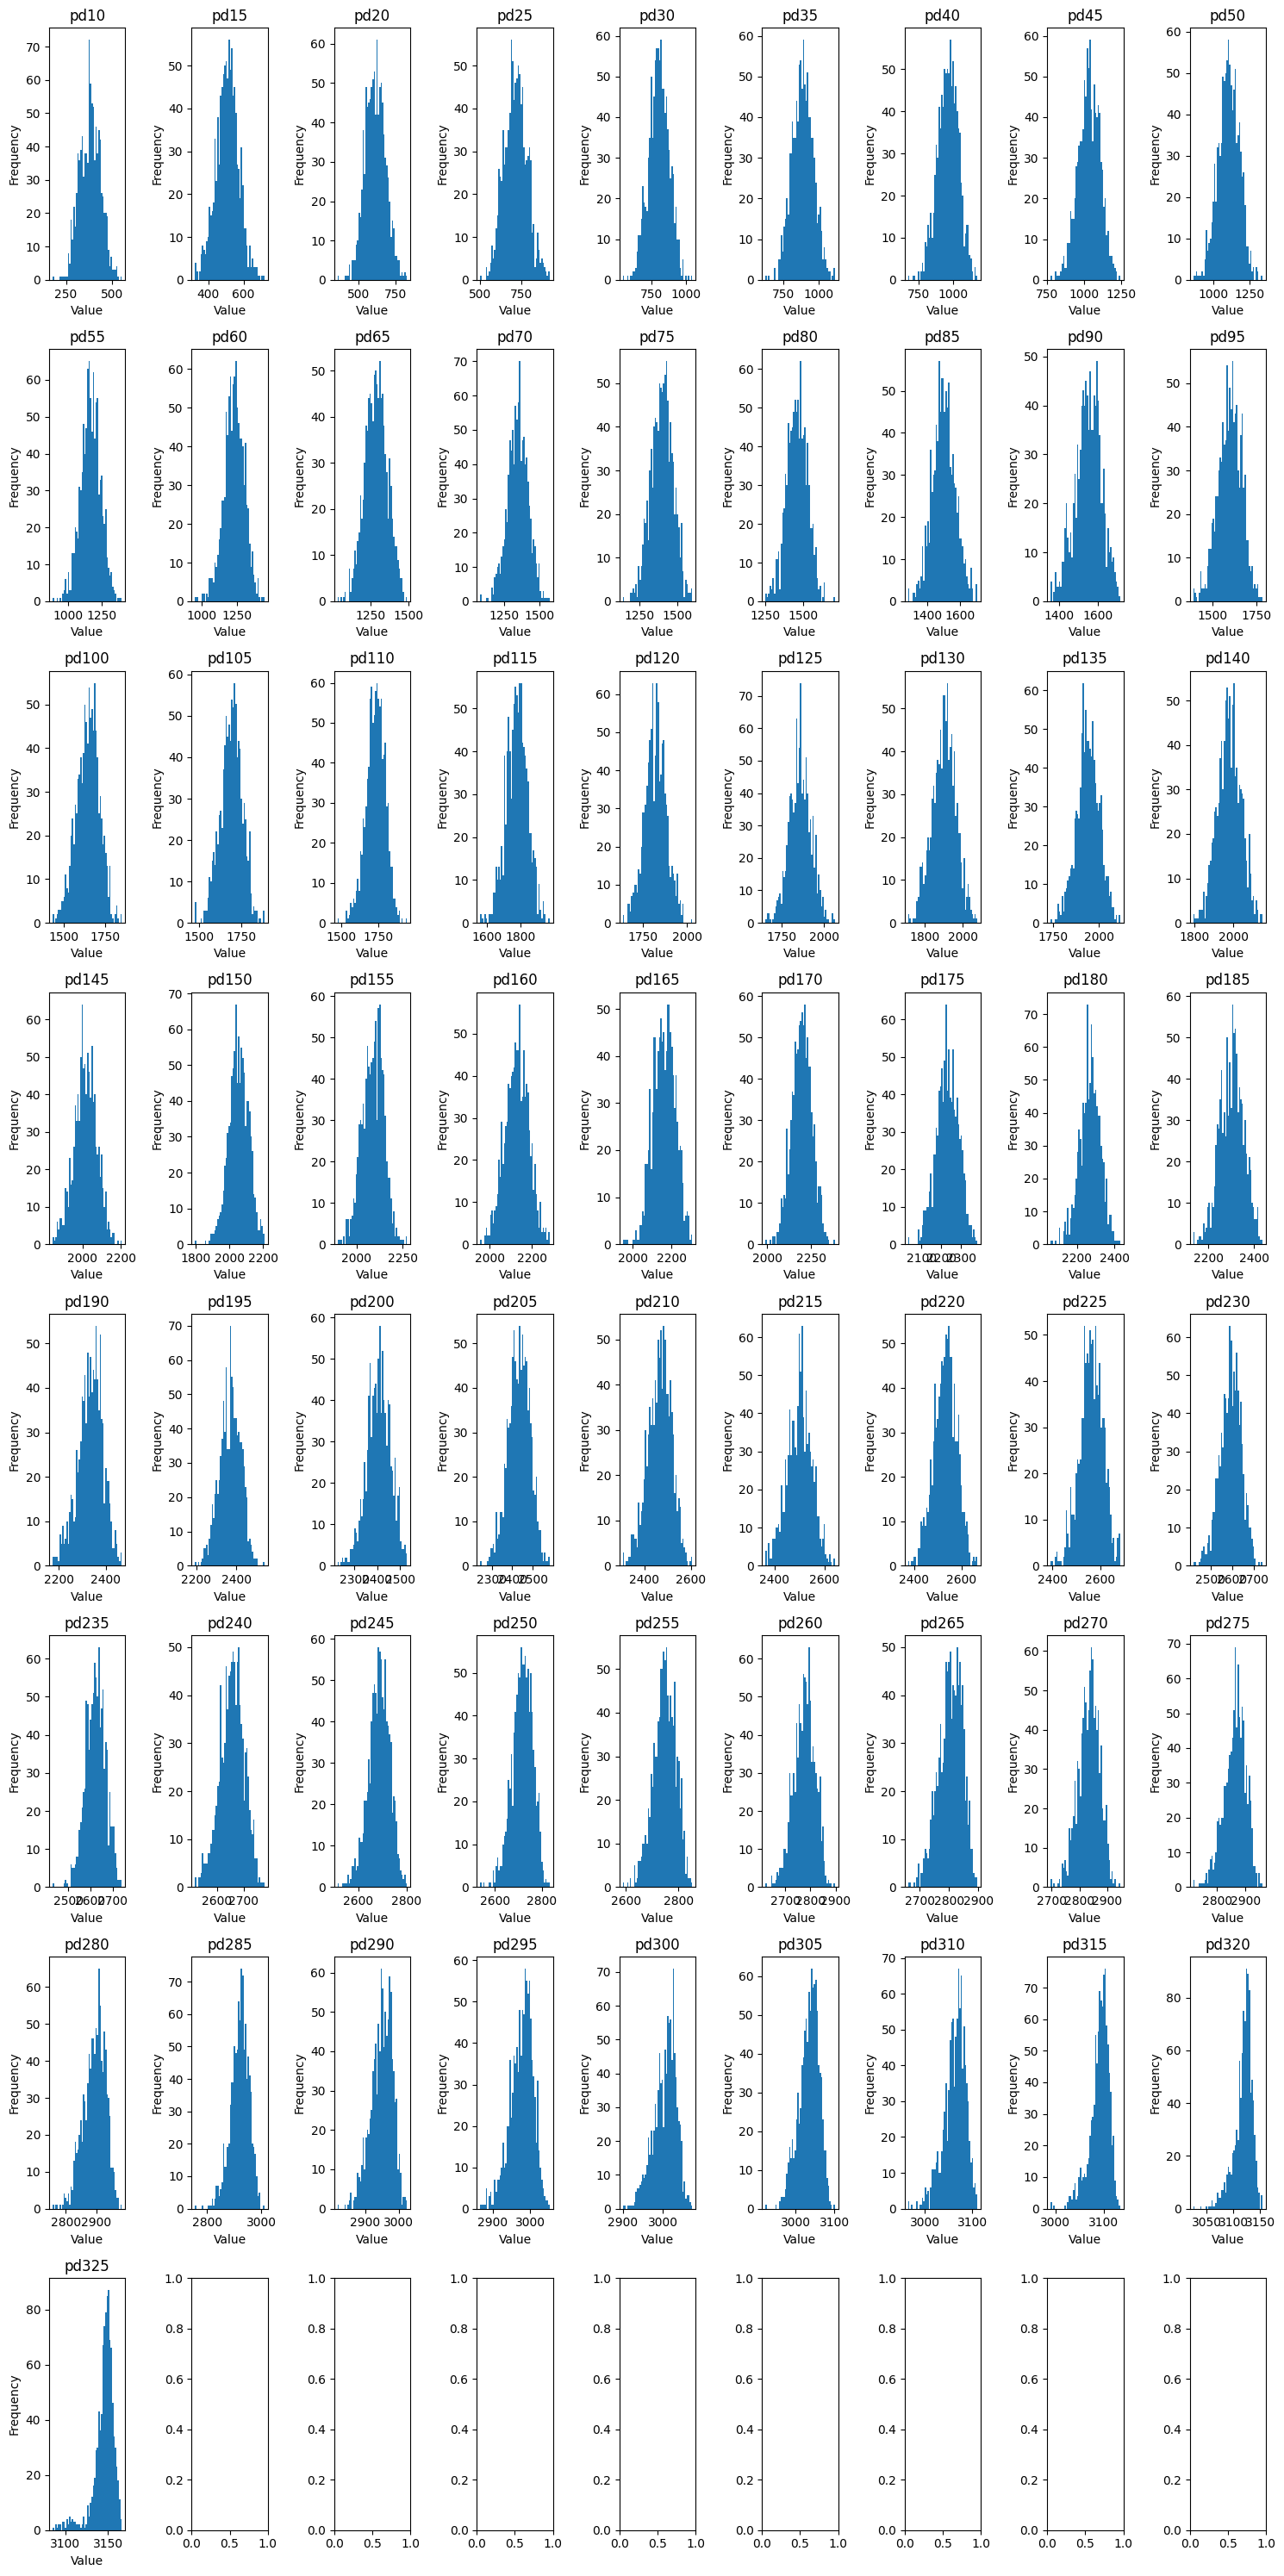

In [773]:
# Define the number of rows and columns for the grid
num_rows = 8  # Number of rows (for each pd)
num_cols = 9   # Number of columns (for each pd)

# Create a figure and axes for the subplots
fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 30))

# Flatten the 2D array of axes for easier indexing
axs = axs.flatten()

# Loop through each pd and create a histogram in the corresponding subplot
for i, pd_value in enumerate(range(10, 330, 5)):
    axs[i].hist(new_pd[f'pd{pd_value}'], bins=50)
    axs[i].set_title(f'pd{pd_value}')
    axs[i].set_xlabel('Value')
    axs[i].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()

plt.draw()
# Save the plot as an image file
save_directory = 'birds/histograms_grid_ecoregion_pd'+ ecoregion_code + '.png'
plt.savefig(save_directory)

# Show the plot
plt.show()


#this is for all of california. 

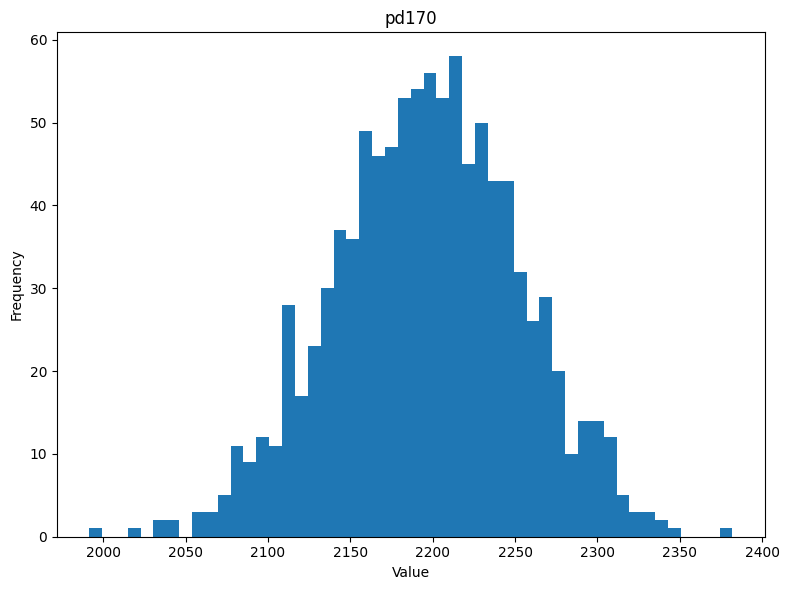

In [774]:
import matplotlib.pyplot as plt

# Filter the data to include only pd170
pd170_data = new_pd['pd170']

# Create a figure and axis for the plot
fig, ax = plt.subplots(figsize=(8, 6))

# Create a histogram for pd170
ax.hist(pd170_data, bins=50)

# Set plot title and labels
ax.set_title('pd170')
ax.set_xlabel('Value')
ax.set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()

# Save the plot as an image file
save_directory = 'birds/histogram_pd170_ecoregion_pd' + ecoregion_code + '.png'
plt.savefig(save_directory)

# Show the plot
plt.show()

In [502]:


#can use values instead of dictionary[key]
#CI conglomerate seems to not have too much function
#this is classical statistics and does NOT represent the data properly. 

#def CI_conglomerate(dictionary): #assuming normal distribution
#    #checks for nans
#    #dictionary = {key: value for key, value in dictionary.items() if not any(np.isnan(value))}
#    low_array = []
#    high_array = []
#    mean_array = []
#    for key, values in dictionary.keys():
#        print(key)
#        mean_temp = np.mean(dictionary[key])
#        CI_temp = st.t.interval(confidence=0.95, df=len(dictionary[key])-1, loc=np.mean(dictionary[key]), scale=st.sem(dictionary[key]))
#        low_array.append(CI_temp[0])
#        high_array.append(CI_temp[1])
#        mean_array.append(mean_temp)
#    return(low_array,high_array,mean_array)

#new_CI = CI_conglomerate(new_mpd)
#print(new_CI)

#issue: have some nan values. 

In [503]:
def CI_bootstrap(dictionary): #assuming normal distribution
    low_array = []
    high_array = []
    mean_array = []
    for key in dictionary.keys():
        #print(key)
        data_temp = dictionary[key]
        upper_bound_bootstrap = np.percentile(data_temp,97.5)
        #print(upper_bound_bootstrap)
        lower_bound_bootstrap = np.percentile(data_temp,2.5)
        #print(lower_bound_bootstrap)
        low_array.append(lower_bound_bootstrap)
        high_array.append(upper_bound_bootstrap)
        mean_array.append(np.mean(dictionary[key]))
    return(low_array,high_array,mean_array)



In [504]:
#could definitely do this in a much much much much much cleaner and better way. 
def quantile_bootstrap(dictionary): #assuming normal distribution
    low_25_array =[]
    low_10_array =[]
    low_5_array = []
    low_2point5_array = []
    low_2_array = []
    low_1point5_array = []
    low_1_array = []
    low_point5_array = []
    high_25_array =[]
    high_10_array =[]
    high_5_array = []
    high_2point5_array = []
    high_2_array = []
    high_1_array = []
    high_1point5_array = []
    high_point5_array = []
    med_array = []
    mean_array = []
    for key in dictionary.keys():
        #print(key)
        data_temp = dictionary[key]
        low_25 = np.percentile(data_temp, 25.0)
        low_10 = np.percentile(data_temp, 10.0)
        low_5 = np.percentile(data_temp, 5.0)
        low_2point5 = np.percentile(data_temp, 2.5)
        low_2 = np.percentile(data_temp, 2)
        low_1point5 = np.percentile(data_temp, 1.5)
        low_1 = np.percentile(data_temp, 1)
        low_point5 = np.percentile(data_temp,0.5)
        high_25 = np.percentile(data_temp, 75.0)
        high_10 = np.percentile(data_temp, 90.0)
        high_5 = np.percentile(data_temp, 95.0)
        high_2point5 = np.percentile(data_temp, 97.5)
        high_2 = np.percentile(data_temp, 98)
        high_1point5 = np.percentile(data_temp,98.5)
        high_1 = np.percentile(data_temp, 99)
        high_point5 = np.percentile(data_temp, 99.5)
        low_25_array.append(low_25)
        low_10_array.append(low_10)
        low_5_array.append(low_5)
        low_2point5_array.append(low_2point5)
        low_2_array.append(low_2)
        low_1point5_array.append(low_1point5)
        low_1_array.append(low_1)
        low_point5_array.append(low_point5)
        high_25_array.append(high_25)
        high_10_array.append(high_10)
        high_5_array.append(high_5)
        high_2point5_array.append(high_2point5)
        high_2_array.append(high_2)
        high_1point5_array.append(high_1point5)
        high_1_array.append(high_1)
        high_point5_array.append(low_point5)

        med_array.append(np.percentile(data_temp, 50)) #median value.
        mean_array.append(np.mean(data_temp))
    
    return(low_point5_array, low_1_array, low_1point5_array, low_2_array, low_2point5_array, low_5_array,low_10_array,low_25_array, high_25_array, high_10_array, high_2point5_array, high_2_array, high_1point5_array, high_1_array, high_point5_array, med_array, mean_array)



In [505]:
#cleaner version of quantiles function 
def quantile_bootstrap_clean(dictionary): 
    data = {}
    for key in dictionary.keys():
        data_temp = dictionary[key]
        quantiles = [0.5, 1, 1.5, 2, 2.5, 5, 10, 25, 75, 90, 97.5, 98, 98.5, 99, 99.5]
        percentiles = {q: np.percentile(data_temp, q) for q in quantiles}
        percentiles['Median'] = np.percentile(data_temp, 50)
        percentiles['Mean'] = np.mean(data_temp)
        data[key] = percentiles

    return pd.DataFrame(data)

In [506]:
CI_mpd_bootstrap = CI_bootstrap(new_mpd) #CI for mpd

CI_mntd_bootstrap = CI_bootstrap(new_mntd)  #CI for mntd

CI_pd_bootstrap = CI_bootstrap(new_pd)

#seems like size of 55 throws an error. 

In [507]:
quantile_mpd_bootstrap = quantile_bootstrap(new_mpd) #CI for mpd

quantile_mntd_bootstrap = quantile_bootstrap(new_mntd) #CI for mpd

quantile_pd_bootstrap = quantile_bootstrap(new_pd) #CI for mpd


#need to expor these quantile data as csvs 

In [508]:
quantile_mpd_bootstrap_clean = quantile_bootstrap_clean(new_mpd)

quantile_mntd_bootstrap_clean = quantile_bootstrap_clean(new_mntd)

quantile_pd_bootstrap_clean = quantile_bootstrap_clean(new_pd)

              pd10        pd15        pd20        pd25        pd30  \
0.5     251.232347  334.814062  448.542180  524.827956  612.942110   
1       262.170525  356.483170  472.859876  543.959852  635.493244   
1.5     268.779252  362.230870  477.710742  558.255355  645.348409   
2       271.943945  375.801401  483.349380  564.615365  651.842434   
2.5     275.772433  382.328233  487.323800  573.041131  659.105497   
5       289.469270  401.231615  499.712355  590.561860  681.748191   
10      310.038188  422.080761  526.224602  617.247923  709.837918   
25      344.101724  462.246414  565.178153  667.115519  755.393766   
75      421.326237  548.909772  662.849888  766.101995  854.241869   
90      451.881785  587.132823  698.102084  809.928375  892.536511   
97.5    484.104169  631.451188  739.076891  846.692740  945.718690   
98      489.391077  639.960367  744.012921  850.169990  951.342557   
98.5    494.579976  644.457465  755.191765  854.407311  958.681114   
99      504.648775  

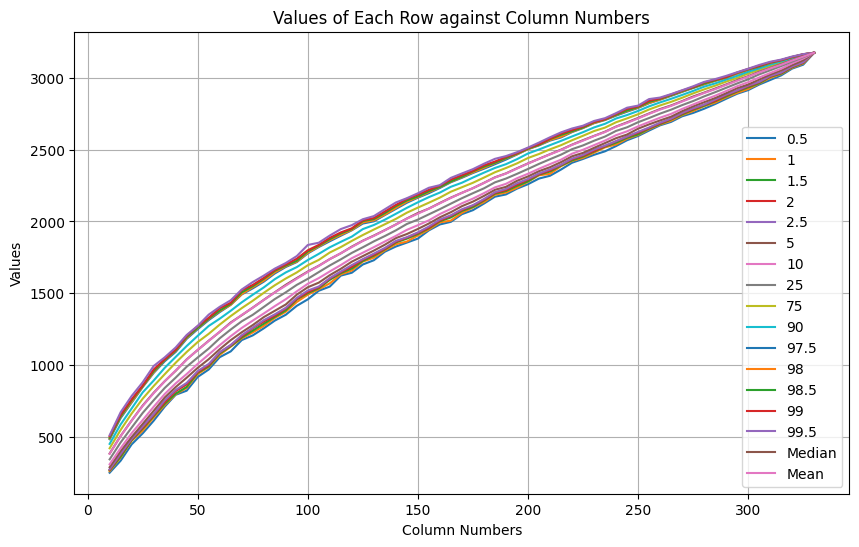

In [509]:
print(quantile_pd_bootstrap_clean)
plt.figure(figsize=(10, 6))
for index, row in quantile_pd_bootstrap_clean.iterrows():
    plt.plot([int(col[2:]) for col in quantile_pd_bootstrap_clean.columns], row, label=index)

plt.xlabel('Column Numbers')
plt.ylabel('Values')
plt.title('Values of Each Row against Column Numbers')
plt.legend()
plt.grid(True)
plt.show()

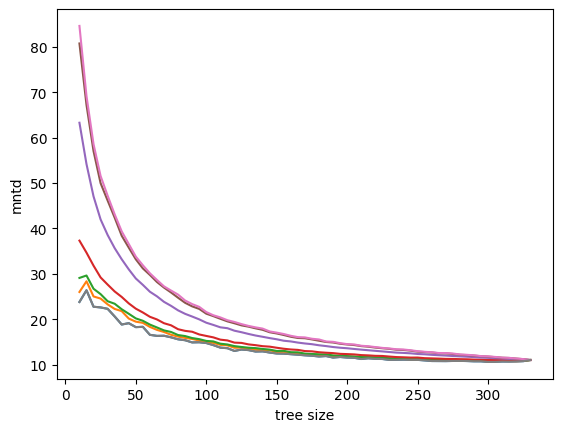

In [510]:
#print(average_mpd_rnd)

#plot the quantiles 
for i in range(len(quantile_mntd_bootstrap)-1):
    if i % 2 == 0:
        plt.plot(tree_sizes, quantile_mntd_bootstrap[i])

labels2 = ("low", "high", "mean")
plt.ylabel("mntd")
plt.xlabel("sample size")
plt.xlabel('tree size')
plt.savefig(os.path.join(save_directory, 'mntd_95CI.jpg'), dpi=1200)
plt.show()

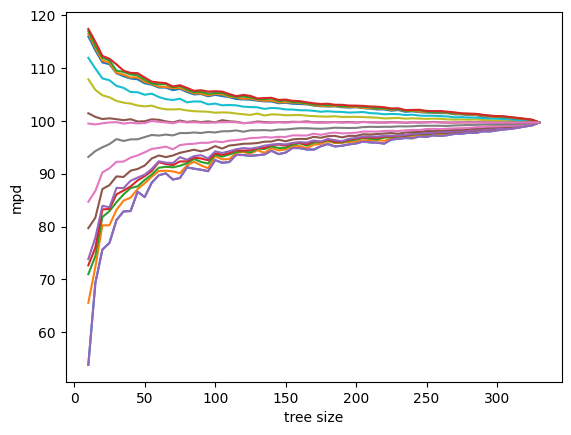

In [511]:
#print(average_mpd_rnd)

#plot the quantiles 
for i in range(len(quantile_mpd_bootstrap)):
    plt.plot(tree_sizes, quantile_mpd_bootstrap[i])

#labels2 = ("low", "high", "mean")
plt.ylabel("mpd")
plt.xlabel("sample size")
plt.xlabel('tree size')
plt.savefig(os.path.join(save_directory, 'mntd_95CI.jpg'), dpi=1200)
plt.show()

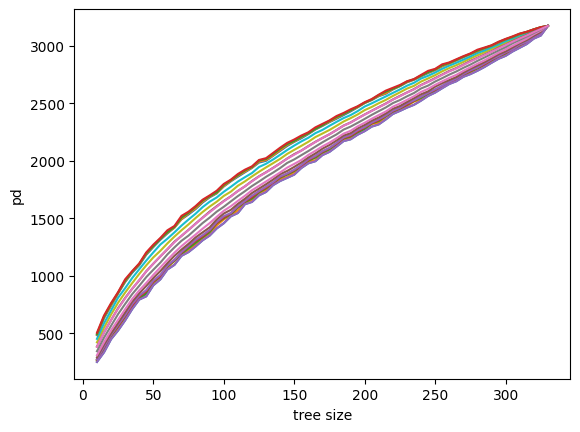

In [512]:
#print(average_mpd_rnd)

#plot the quantiles 
for i in range(len(quantile_pd_bootstrap)):
    plt.plot(tree_sizes, quantile_pd_bootstrap[i])

#labels2 = ("low", "high", "mean")
plt.ylabel("pd")
plt.xlabel("sample size")
plt.xlabel('tree size')
plt.savefig(os.path.join(save_directory, 'mntd_95CI.jpg'), dpi=1200)
plt.show()

In [513]:
#target_directory = os.getcwd() + "/"+ JOBID +"_output_files/"

#os.listdir(target_directory)

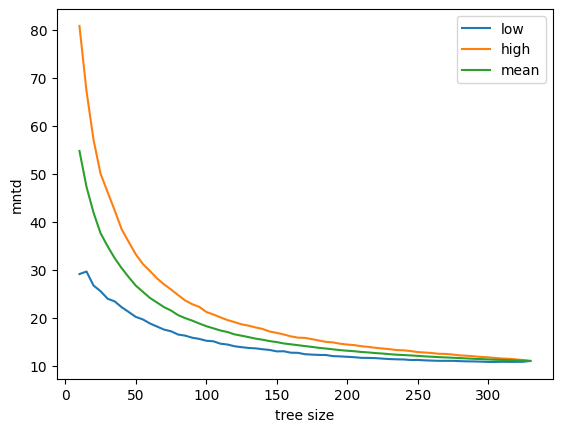

In [514]:
#print(average_mpd_rnd)
plt.plot(tree_sizes, CI_mntd_bootstrap[0])
plt.plot(tree_sizes, CI_mntd_bootstrap[1])
plt.plot(tree_sizes,CI_mntd_bootstrap[2])
labels2 = ("low", "high", "mean")
plt.ylabel("mnpd")
plt.xlabel("sample size")
#plt.title('95% CI for expected Mntd across tree sizes')
plt.xlabel('tree size')
plt.ylabel('mntd')
plt.legend(labels2)
plt.savefig(os.path.join(save_directory, 'mntd_95CI.jpg'), dpi=1200)


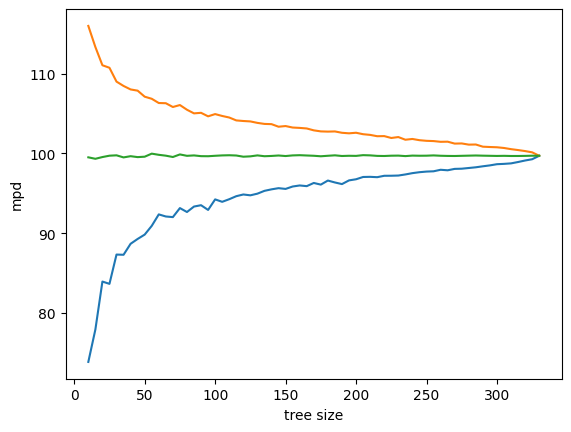

In [515]:
plt.plot(tree_sizes, CI_mpd_bootstrap[0])
plt.plot(tree_sizes, CI_mpd_bootstrap[1])
plt.plot(tree_sizes,CI_mpd_bootstrap[2])
labels2 = ("low", "high", "mean")
plt.ylabel("mpd")
plt.xlabel("sample size")
#plt.title('95% CI for expected Mpd across tree sizes')
plt.xlabel('tree size')
plt.ylabel('mpd')
plt.savefig(os.path.join(save_directory, 'mpd_95CI.jpg'), dpi=1200)


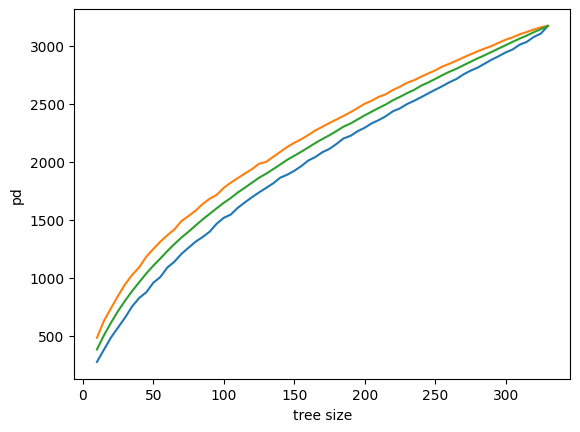

In [516]:
plt.plot(tree_sizes, CI_pd_bootstrap[0])
plt.plot(tree_sizes, CI_pd_bootstrap[1])
plt.plot(tree_sizes,CI_pd_bootstrap[2])
labels2 = ("low", "high", "mean")
plt.ylabel("pd")
plt.xlabel("sample size")
#plt.title('95% CI for expected [d] across tree sizes')
plt.xlabel('tree size')
plt.ylabel('pd')
plt.savefig(os.path.join(save_directory, 'pd_95CI.jpg'), dpi=1200)



In [517]:
CI_export_mpd = pd.DataFrame(CI_mpd_bootstrap)
CI_colnames = dict.keys(new_mpd)
CI_export_mpd.columns = CI_colnames
CI_export_mpd.index = ["Low", "High", "Mean"]
CI_export_mpd.to_csv(os.path.join(save_directory,extra_naming_info + "CI_mpd_output_bootstrap_bird.csv"))


In [518]:
CI_export_mntd = pd.DataFrame(CI_mntd_bootstrap)
CI_colnames = dict.keys(new_mntd)
CI_export_mntd.columns = CI_colnames
CI_export_mntd.index = ["Low", "High", "Mean"]
CI_export_mntd.to_csv(os.path.join(save_directory, extra_naming_info + "CI_mntd_output_bootstrap_bird.csv"))

In [519]:
CI_export_pd = pd.DataFrame(CI_pd_bootstrap)
CI_colnames = dict.keys(new_pd)
CI_export_pd.columns = CI_colnames
CI_export_pd.index = ["Low", "High", "Mean"]
CI_export_pd.to_csv(os.path.join(save_directory,extra_naming_info + "CI_pd_output_bootstrap_bird.csv"))

In [520]:

quantile_export_mpd = pd.DataFrame(quantile_mpd_bootstrap_clean)
quantile_export_mpd.to_csv(os.path.join(save_directory, extra_naming_info + "_quantile_mpd_output_bootstrap.csv"))

quantile_export_mntd = pd.DataFrame(quantile_mntd_bootstrap_clean)
quantile_export_mntd.to_csv(os.path.join(save_directory, extra_naming_info + "_quantile_mntd_output_bootstrap.csv"))

quantile_export_pd = pd.DataFrame(quantile_pd_bootstrap_clean)
quantile_export_pd.to_csv(os.path.join(save_directory, extra_naming_info + "_quantile_pd_output_bootstrap.csv"))

